In [1]:
import scanpy as sc
import scrublet as scr
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp
import scipy.stats as stats
from glob import glob

Scanpy has weird default values that are often immediately changed by convention. The first is that scanpy by default will only show warning+error messages. We would like to change this as it also offers 'Hints' if you set verbosity to 3.

In [2]:
sc.settings.verbosity = 3

Here we are simply iterating through all of the '*/outs/filtered_feature_bc_matrix' directories and importing the single cell dataset into a scanpy object. 

1. I generate a list of directory paths to cellranger output directories
2. I generate a dictionary containing anndata objects with sample_name as  `keys`
3. I concatinate these anndata objects into a single dataset 
4. I ensure that all the obs and var are unique

In [7]:
dirpaths = glob('/home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/*_filtered.h5')
adatas = {dirpath.split('/')[10]: sc.read_10x_h5(dirpath) for dirpath in dirpaths}

reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR9897622_filtered.h5
 (0:00:00)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR12539463_filtered.h5


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR9897624_filtered.h5


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR12539462_filtered.h5


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR12603780_filtered.h5


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR9897625_filtered.h5


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR14615558_filtered.h5


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR9897623_filtered.h5


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellBender/Lai/SRR9897621_filtered.h5


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)


/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## Doublet Prediction: scrublet

In [10]:
for path in dirpaths:
    ID = path.split('/')[10]
    adata = adatas[ID]
    count_matrix = adata.X
    print(count_matrix)
    break

  (0, 16)	1
  (0, 24)	14
  (0, 29)	52
  (0, 30)	40
  (0, 32)	5
  (0, 36)	6
  (0, 37)	1
  (0, 38)	1
  (0, 44)	11
  (0, 45)	1
  (0, 48)	10
  (0, 52)	6
  (0, 53)	9
  (0, 55)	7
  (0, 57)	3
  (0, 59)	79
  (0, 60)	13
  (0, 61)	3
  (0, 62)	43
  (0, 64)	5
  (0, 68)	1
  (0, 69)	5
  (0, 71)	6
  (0, 73)	9
  (0, 74)	1
  :	:
  (13232, 31279)	1
  (13232, 31445)	1
  (13232, 31497)	1
  (13232, 32445)	1
  (13232, 32799)	1
  (13232, 33201)	1
  (13232, 34011)	1
  (13232, 35860)	1
  (13232, 36043)	1
  (13232, 36136)	1
  (13232, 36560)	1
  (13232, 36561)	1
  (13232, 36562)	1
  (13232, 36568)	2
  (13233, 21902)	2
  (13233, 36559)	3
  (13233, 36560)	10
  (13233, 36561)	11
  (13233, 36562)	44
  (13233, 36564)	12
  (13233, 36565)	8
  (13233, 36566)	10
  (13233, 36568)	9
  (13233, 36569)	2
  (13233, 36571)	8


## Pre-Processing Single-Cell RNA-seq Count Data: Scanpy

In [ ]:
adata = ad.concat(adatas, label='sample')
adata.obs_names_make_unique
adata.var_names_make_unique

A common first pre-processing step is to evaluate top gene expression in your samples, to ensure they align with what you would expect within your samples. It is often difficult to see these distributions because they are heavily right skewed so I like to include the `log=True` tag to show log transformed data. please note the x-axis is log transformed (as displayed below). 

normalizing counts per cell


    finished (0:00:37)


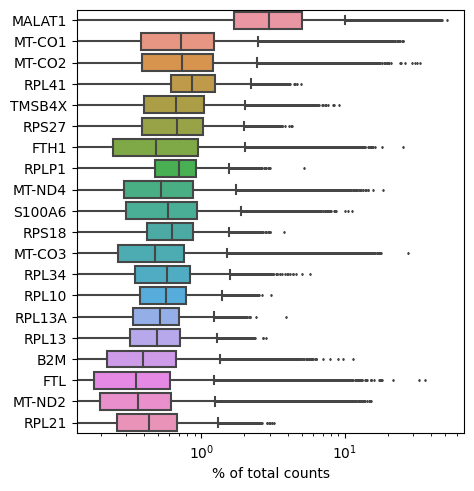

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20, show=True, log=True)